In [1]:
import pandas as pd
import zipfile
import datetime

import warnings
# Suprimir warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt


In [2]:
!pip install -q kaggle

In [3]:
api_token = {"username":"ljisaza",
             "key":"51aa71baba3840f1e23d2d2445636fe8"}

In [4]:
!rm -rf /root/.kaggle.

In [5]:
!mkdir /root/.kaggle

In [6]:
!touch ~/.kaggle/kaggle.json

In [7]:
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

In [8]:
!chmod 600 /root/.kaggle/kaggle.json # Permiso para almacenar las credenciales

In [9]:
!kaggle datasets download -d elemento/nyc-yellow-taxi-trip-data

100% 1.78G/1.78G [00:16<00:00, 74.7MB/s]
100% 1.78G/1.78G [00:16<00:00, 113MB/s] 


In [10]:
archivo_zip = "/content/nyc-yellow-taxi-trip-data.zip"

with zipfile.ZipFile(archivo_zip,'r') as zip_file:

    for nombre_archivo in zip_file.namelist():

      print(nombre_archivo)

yellow_tripdata_2015-01.csv
yellow_tripdata_2016-01.csv
yellow_tripdata_2016-02.csv
yellow_tripdata_2016-03.csv


In [11]:
dataset = 'yellow_tripdata_2015-01.csv'

with zipfile.ZipFile(archivo_zip,'r') as zip_file:
  with zip_file.open(dataset) as archivo_csv:
    dataset = pd.read_csv(archivo_csv)

In [12]:
dataset

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748981,1,2015-01-10 19:01:44,2015-01-10 19:05:40,2,1.00,-73.951988,40.786217,1,N,-73.953735,40.775162,1,5.5,0.0,0.5,1.25,0.0,0.3,7.55
12748982,1,2015-01-10 19:01:44,2015-01-10 19:07:26,2,0.80,-73.982742,40.728184,1,N,-73.974976,40.720013,1,6.0,0.0,0.5,2.00,0.0,0.3,8.80
12748983,1,2015-01-10 19:01:44,2015-01-10 19:15:01,1,3.40,-73.979324,40.749550,1,N,-73.969101,40.787800,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30
12748984,1,2015-01-10 19:01:44,2015-01-10 19:17:03,1,1.30,-73.999565,40.738483,1,N,-73.981819,40.737652,1,10.5,0.0,0.5,2.25,0.0,0.3,13.55


**Limpieza de los datos**

Como el Dataset es tan grande y los recursos son limitados, utilizare solo una parte del dataset, 2.000.000 de registros

In [13]:
dataset_new= dataset.head(2000000)
dataset_new

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2,2015-01-14 16:35:56,2015-01-14 16:42:19,1,0.78,-73.972885,40.758919,1,N,-73.972885,40.758919,2,6.0,1.0,0.5,0.00,0.0,0.3,7.80
1999996,2,2015-01-14 16:35:57,2015-01-14 16:48:01,1,2.14,-73.954330,40.781292,1,N,-73.979179,40.771667,1,10.0,1.0,0.5,2.20,0.0,0.3,14.00
1999997,2,2015-01-14 16:35:57,2015-01-14 16:51:05,1,2.38,-73.958389,40.784313,1,N,-73.982010,40.759956,1,12.0,1.0,0.5,0.00,0.0,0.3,13.80
1999998,2,2015-01-14 16:35:57,2015-01-14 16:50:01,1,3.20,-73.956688,40.766991,1,N,-73.984810,40.779297,1,13.0,1.0,0.5,1.50,0.0,0.3,16.30


In [14]:
# Exploración inicial
print("Primeras filas del conjunto de datos:")
print(dataset_new.head())

Primeras filas del conjunto de datos:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42                1   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28                1   
2         1  2015-01-10 20:33:38   2015-01-10 20:43:41                1   
3         1  2015-01-10 20:33:39   2015-01-10 20:35:31                1   
4         1  2015-01-10 20:33:39   2015-01-10 20:52:58                1   

   trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
0           1.59        -73.993896        40.750111           1   
1           3.30        -74.001648        40.724243           1   
2           1.80        -73.963341        40.802788           1   
3           0.50        -74.009087        40.713818           1   
4           3.00        -73.971176        40.762428           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.

In [15]:
# Valores nulos o faltantes
missing_values = dataset_new.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values)


Valores nulos por columna:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


No se encuentran datos perdidos

In [16]:
# Duplicados
duplicate_rows = dataset_new[dataset_new.duplicated()]
print("\nCantidad de filas duplicadas:", len(duplicate_rows))


Cantidad de filas duplicadas: 124


In [17]:
# Eliminar filas duplicadas
data_cleaned = dataset_new.drop_duplicates()

# Verificar el número de filas antes y después de la eliminación
print("Número de filas antes de la eliminación:", len(dataset_new))
print("Número de filas después de la eliminación de duplicados:", len(data_cleaned))

Número de filas antes de la eliminación: 2000000
Número de filas después de la eliminación de duplicados: 1999876


Adicional se tendrá en cuenta unicamente tendré en cuenta los registros cuyas coordenadas estén dentro de New York:
(latitud,longitud) - (40.5774, -74.15) & (40.9176,-73.7004)

In [18]:
# Definir los límites de coordenadas de Nueva York
min_longitud = -74.15
max_longitud = -73.7004
min_latitud = 40.5774
max_latitud = 40.9176

# Filtrar el conjunto de datos para incluir solo las coordenadas de Nueva York
data_filtered = data_cleaned[
    (data_cleaned['pickup_longitude'] >= min_longitud) & (data_cleaned['pickup_longitude'] <= max_longitud) &
    (data_cleaned['pickup_latitude'] >= min_latitud) & (data_cleaned['pickup_latitude'] <= max_latitud)
]

# Verificar el número de filas antes y después de la filtración
print("Número de filas antes de la filtración:", len(data_cleaned))
print("Número de filas después de la filtración:", len(data_filtered))

Número de filas antes de la filtración: 1999876
Número de filas después de la filtración: 1960996


Se hace la eliminación de 38.880 registros que estaban por fuera de las coordenadas de New York.

Según NYC Taxi & Limousine Commision Regulations, la duración máxima permitida del viaje en un intervalo de 24 horas es de 12 horas.

In [19]:
# Convertir las columnas de fecha y hora a tipo datetime
data_filtered['tpep_pickup_datetime'] = pd.to_datetime(data_filtered['tpep_pickup_datetime'])
data_filtered['tpep_dropoff_datetime'] = pd.to_datetime(data_filtered['tpep_dropoff_datetime'])

# Calcular la duración del servicio en minutos y crear una nueva columna
data_filtered['duration_minutes'] = (data_filtered['tpep_dropoff_datetime'] - data_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60.0

# Aplicar filtro para limitar a viajes con duración menor o igual a 720 minutos (12 horas)
data_ny = data_filtered[data_filtered['duration_minutes'] <= 720]

# Verificar el número de filas antes y después de la filtración
print("Número de filas antes de la filtración:", len(data_filtered))
print("Número de filas después de la filtración:", len(data_ny))

Número de filas antes de la filtración: 1960996
Número de filas después de la filtración: 1959686


**Exploración de los datos**

¿Cuáles son las horas pico con mayor demanda de taxis?

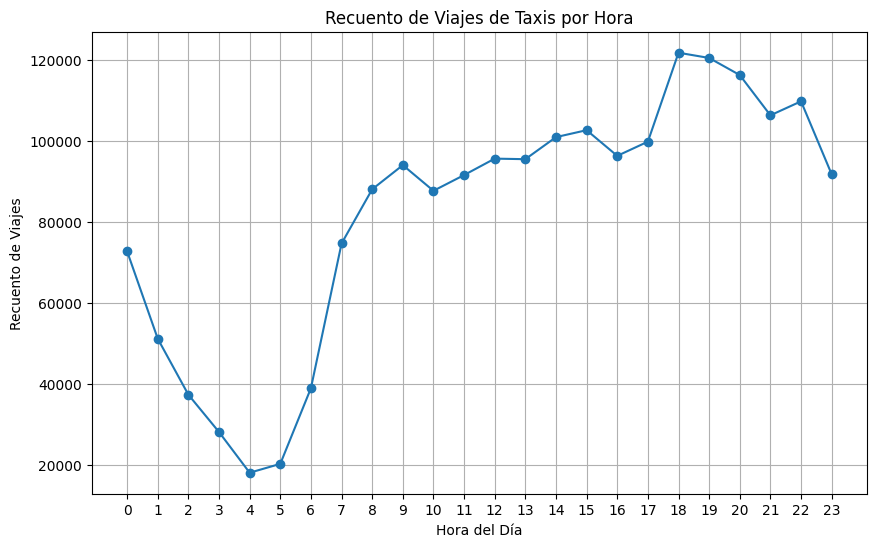

In [21]:
# Agregar una columna para la hora del día
data_ny['hour'] = data_ny['tpep_pickup_datetime'].dt.hour

# Calcular el recuento de viajes por hora
hourly_counts = data_ny['hour'].value_counts().sort_index()

# Graficar el recuento de viajes por hora
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Recuento de Viajes de Taxis por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Recuento de Viajes')
plt.xticks(range(24))
plt.grid(True)
plt.show()

A partir de las 6:00 pm se observa la mayor demanda de taxis

Rutas más frecuentes

In [22]:
# Crear una columna para identificar la ruta (combinación de ubicaciones)
data_ny['route'] = data_ny['pickup_longitude'].round(2).astype(str) + '_' + data_ny['pickup_latitude'].round(2).astype(str) + '_' + data_ny['dropoff_longitude'].round(2).astype(str) + '_' + data_ny['dropoff_latitude'].round(2).astype(str)

# Contar las rutas más frecuentes
frequent_routes = data_ny['route'].value_counts().head(10)

print("Rutas más frecuentes:")
print(frequent_routes)

Rutas más frecuentes:
-73.99_40.75_-73.98_40.76    10926
-73.98_40.76_-73.99_40.75     9662
-73.97_40.76_-73.96_40.77     9445
-73.99_40.75_-73.98_40.75     9032
-73.96_40.77_-73.97_40.76     8952
-73.98_40.75_-73.99_40.75     8479
-73.97_40.76_-73.98_40.75     8377
-73.99_40.75_-73.99_40.76     7960
-73.99_40.76_-73.98_40.76     7935
-73.97_40.76_-73.98_40.76     7829
Name: route, dtype: int64


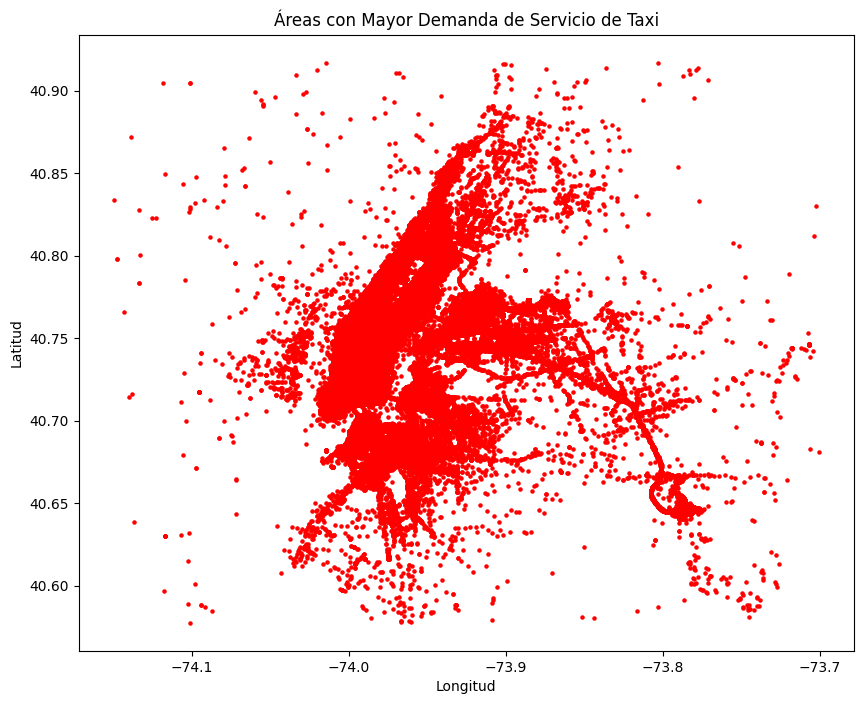

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de ejes
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Crear un mapa de calor utilizando la función scatter
scatter = ax.scatter(data_ny['pickup_longitude'], data_ny['pickup_latitude'], c='red', s=5)

# Agregar título y etiquetas de ejes
plt.title('Áreas con Mayor Demanda de Servicio de Taxi')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa de calor
plt.show()